In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.cluster import KMeans
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Read in two sheets from Excel file as seperate DataFrames
# retail_2009_2010 = pd.read_excel("./Resources/online_retail_II.xlsx", sheet_name= "Year 2009-2010")
# retail_2010_2011 = pd.read_excel("./Resources/online_retail_II.xlsx", sheet_name= "Year 2010-2011")

In [3]:
# Save each DataFrame to a CSV file 
# retail_2009_2010.to_csv('./Resources/retail_2009_2010.csv', index=False)
# retail_2010_2011.to_csv('./Resources/retail_2010_2011.csv', index=False)

In [4]:
# Read in CSV files as separate DataFrames 
retail_2009_2010 = pd.read_csv('./Resources/retail_2009_2010.csv')
retail_2010_2011 = pd.read_csv('./Resources/retail_2010_2011.csv')

In [5]:
df = pd.concat([retail_2009_2010, retail_2010_2011])
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
# Save concated DataFrame to a CSV file
# df.to_csv('./Resources/retail_2009_2011.csv', index=False)

In [7]:
#Dataframe does not have a total cost expression, to add it (per products)
df["TotalPrice"] = df["Quantity"] * df["Price"]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [8]:
# Missing Values
print(df.isnull().sum())
print("---------------")

print("Number of lines before removing missing values: ", df.shape[0])

# Dropping Missing Values
df.dropna(inplace=True)

print("Number of lines after removing missing values: ", df.shape[0])

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
TotalPrice          0
dtype: int64
---------------
Number of lines before removing missing values:  1067371
Number of lines after removing missing values:  824364


In [9]:
# Duplicated records
print(df.duplicated().sum())
print("---------------")

print("Number of records before removing duplicated values: ", df.shape[0])

# Dropping duplicated Values
df.drop_duplicates(inplace=True)

print("Number of records after removing duplicated values: ", df.shape[0])


26479
---------------
Number of records before removing duplicated values:  824364
Number of records after removing duplicated values:  797885


In [10]:
# Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
 8   TotalPrice   797885 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 60.9+ MB


In [11]:
# Convert InvoiceDate to date time format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

In [12]:
# Unique Invoice Count
print("Unique Invoice Count: ", df["Invoice"].nunique())

# Unique Customer Count
print("Unique Customer Count: ", df["Customer ID"].nunique())

Unique Invoice Count:  44876
Unique Customer Count:  5942


In [13]:
# Summary Statistics
df.describe()

,Quantity,Price,Customer ID,TotalPrice
count,797885.000000,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777,20.416465
std,191.670371,71.392549,1696.466663,313.518824
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13964.000000,4.350000
50%,5.000000,1.950000,15228.000000,11.700000
75%,12.000000,3.750000,16788.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [14]:
# correlation coefficients
df.corr()

,Quantity,Price,Customer ID,TotalPrice
Quantity,1.000000,-0.001918,-0.005171,0.853959
Price,-0.001918,1.000000,-0.003789,-0.150720
Customer ID,-0.005171,-0.003789,1.000000,-0.002943
TotalPrice,0.853959,-0.150720,-0.002943,1.000000


In [15]:
# How Many of the Products were Sold
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,103505
WHITE HANGING HEART T-LIGHT HOLDER,88126
ASSORTED COLOUR BIRD ORNAMENT,77755
JUMBO BAG RED RETROSPOT,73033
BROCADE RING PURSE,69343
PACK OF 60 PINK PAISLEY CAKE CASES,54373
60 TEATIME FAIRY CAKE CASES,52502
PACK OF 72 RETRO SPOT CAKE CASES,44480
PACK OF 72 RETROSPOT CAKE CASES,44356


In [16]:
# Total Price per Invoice
df.groupby("Invoice").agg({"TotalPrice": "sum"}).head(10)

,TotalPrice
Invoice,
489434,505.30
489435,145.80
489436,630.33
489437,310.75
489438,2286.24
489439,426.30
489440,50.40
489441,344.34
489442,382.37


In [17]:
# Date Ranges in the Dataframe
print("Oldest date:", df["InvoiceDate"].min())
print("Newest date:", df["InvoiceDate"].max())

Oldest date: 2009-12-01 07:45:00
Newest date: 2011-12-09 12:50:00


In [18]:
#Let's see top 10 best sellers of this shop in 2010
best_seller = df.sort_values('Invoice', ascending = False).head(10)
best_seller.rename(columns = {'Invoice':''}, inplace = True)
best_seller

,,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-6.25
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,-23.40
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60
540143,C581470,23084,RABBIT NIGHT LIGHT,-4,2011-12-08 19:28:00,2.08,17924.0,United Kingdom,-8.32
540142,C581468,22098,BOUDOIR SQUARE TISSUE BOX,-12,2011-12-08 19:26:00,0.39,13599.0,United Kingdom,-4.68
540141,C581468,21314,SMALL GLASS HEART TRINKET POT,-10,2011-12-08 19:26:00,2.10,13599.0,United Kingdom,-21.00


In [19]:
# Remove outliers
z_scores = stats.zscore(df['Quantity'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
retail_df = df[filtered_entries]
retail_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


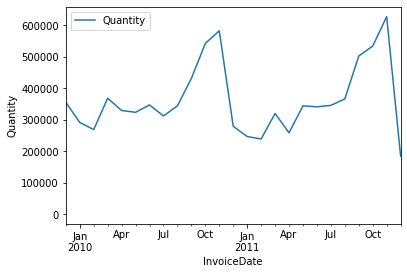

In [20]:
# Time Series Analysis
# Explore the trend, seasonality, and cyclical patterns in the data using visualizations like line plots

# group the data by month and plot the results using the following code

retail_df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Quantity'].sum().plot(kind='line')
sns.scatterplot(x='InvoiceDate', y='Quantity', data=retail_df);
# sns.histplot(x='InvoiceDate', data=retail_df)

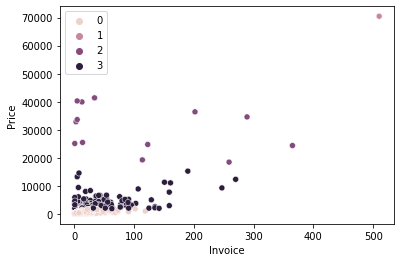

In [21]:
# Customer Segmentation
# Analyze the customer behavior by segmenting them based on their purchase history, frequency, and monetary value using clustering techniques
customer_df = retail_df.groupby('Customer ID').agg({'Invoice': pd.Series.nunique, 'Price': np.sum})
kmeans = KMeans(n_clusters=4, random_state=42).fit(customer_df)
sns.scatterplot(x='Invoice', y='Price', hue=kmeans.labels_, data=customer_df);


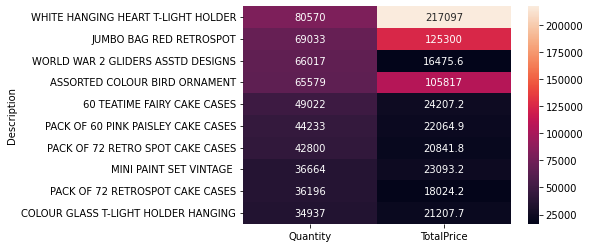

In [22]:
# Product Analysis
# Analyze the sales performance of the products by looking at their 
# quantity, TotalPrice, and popularity using visualizations like heat maps
product_df = retail_df.groupby('Description').agg({'Quantity': np.sum, 'Price': np.mean})
top_products = product_df.nlargest(10, 'Quantity')
pivot_df = retail_df.pivot_table(index='Description', values=['Quantity', 'TotalPrice'], aggfunc=np.sum)
top_pivot_df = pivot_df.loc[top_products.index]
sns.heatmap(top_pivot_df, annot=True, fmt='g');


In [23]:
print(retail_df['Country'].unique())


['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Nigeria'
 'Malta' 'RSA' 'Singapore' 'Bahrain' 'Thailand' 'Israel' 'Lithuania'
 'West Indies' 'Korea' 'Brazil' 'Canada' 'Iceland' 'Lebanon'
 'Saudi Arabia' 'Czech Republic' 'European Community']


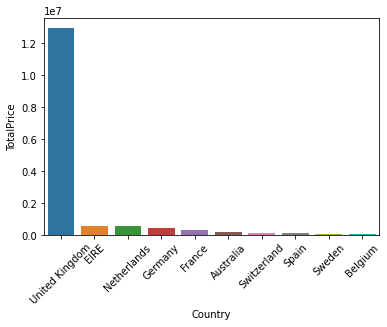

In [24]:
# Analyze the total revenue generated by each country
revenue_by_country = retail_df.groupby('Country')[['TotalPrice']].sum().reset_index()
revenue_by_country = revenue_by_country.sort_values(by='TotalPrice', ascending=False)[:10] # only top 10 countries
sns.barplot(data=revenue_by_country, x='Country', y='TotalPrice')
plt.xticks(rotation=45)
plt.show()

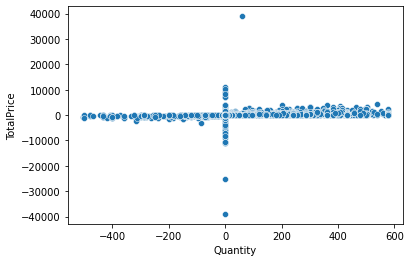

In [25]:
# Analyze the relationship between the quantity of products sold and the total sales revenue
sns.scatterplot(data=retail_df, x='Quantity', y='TotalPrice');

In [26]:
# Analyze the customer purchase behavior by identifying the top 10 customers by total purchases and revenue
top_customers = retail_df.groupby('Customer ID')[['Quantity', 'TotalPrice']].sum()
top_customers = top_customers.sort_values(by=['Quantity', 'TotalPrice'], ascending=False).head(10)
top_customers

,Quantity,TotalPrice
Customer ID,,
14646.0,351668,506933.43
13694.0,166950,186528.36
18102.0,156429,515203.91
14156.0,155965,291267.28
14911.0,141110,265636.31
17511.0,114849,168395.62
14298.0,98954,90111.31
12415.0,87883,139722.09
16684.0,81759,131781.61


In [27]:
# Analyze the most profitable products by calculating the profit margin


cost_price = retail_df['TotalPrice'] / retail_df['Quantity']
profit_margin = (retail_df['TotalPrice'] - (cost_price * retail_df['Quantity'])) / retail_df['TotalPrice']
profitable_products = pd.DataFrame({'StockCode': retail_df['StockCode'], 'Description': retail_df['Description'], 'ProfitMargin': profit_margin})
profitable_products = profitable_products.groupby(['StockCode', 'Description'])[['ProfitMargin']].mean()
profitable_products = profitable_products.sort_values(by='ProfitMargin', ascending=False).head(10)
profitable_products

ProfitMargin
StockCode Description                                   
10002     INFLATABLE POLITICAL GLOBE                 0.0
44242B    PINK FEATHERS CURTAIN                      0.0
44241C    BLUE BUTTERFLY ON SPRING                   0.0
44236     PINK/PURPLE CIRCLE CURTAIN                 0.0
44235     ASSORTED COLOURED CIRCLE MOBILE            0.0
          ASS COL CIRCLE MOBILE                      0.0
44234     ASSORTED CIRCULAR MOBILE                   0.0
44230     SQUARE MIRROR CURTAIN                      0.0
44228     CANNABIS LEAF BEAD CURTAIN                 0.0
44217M    MULTICOLOUR FEATHERS CURTAIN               0.0

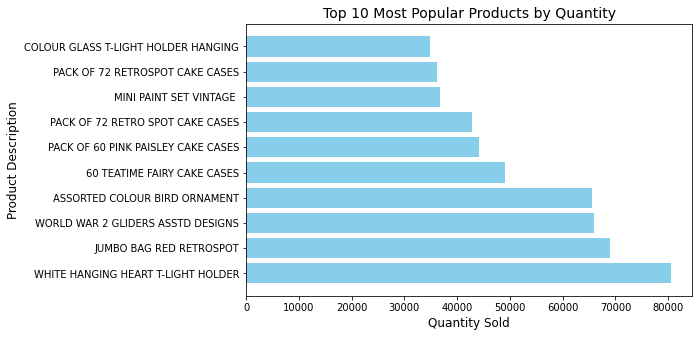

In [37]:
# Identify the top 10 most popular products by quantity and total sales
top_products = retail_df.groupby(['StockCode', 'Description'])[['Quantity', 'TotalPrice']].sum()
top_products = top_products.sort_values(by=['Quantity', 'TotalPrice'], ascending=False).head(10)
top_products

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(top_products.index.get_level_values(1), top_products['Quantity'], color='skyblue')

# Set chart title and labels
ax.set_title('Top 10 Most Popular Products by Quantity', fontsize=14)
ax.set_xlabel('Quantity Sold', fontsize=12)
ax.set_ylabel('Product Description', fontsize=12)

# Show the chart
plt.show()

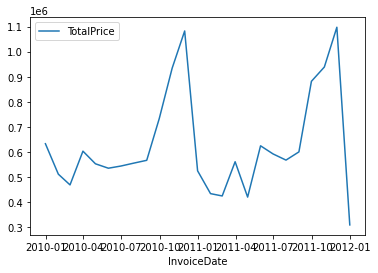

In [29]:
# Visualize the sales trend over time
sales_over_time = retail_df.set_index('InvoiceDate').resample('M')[['TotalPrice']].sum()
sns.lineplot(data=sales_over_time);

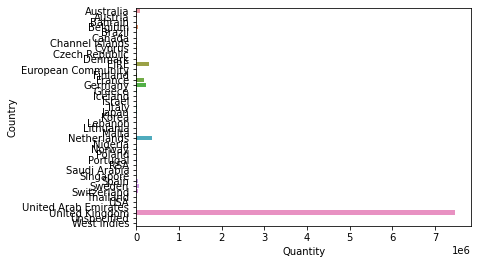

In [30]:
# Geographic Analysis
# Analyze the sales performance by country, region, or city using geographic maps and visualizations:

country_df = retail_df.groupby('Country').agg({'Quantity': np.sum, 'Price': np.mean}).reset_index()
sns.barplot(x='Quantity', y='Country', data=country_df);

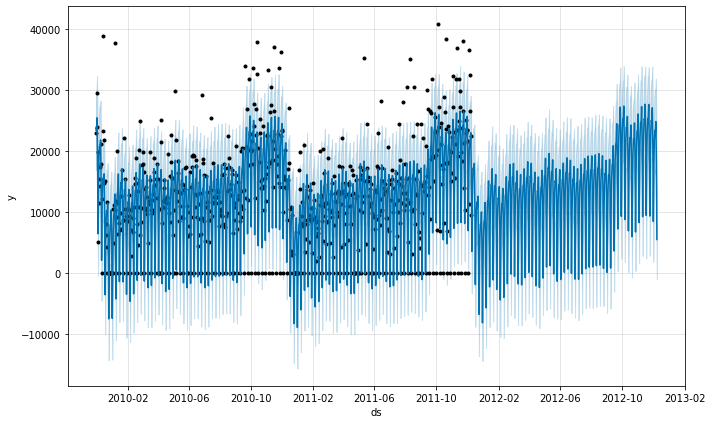

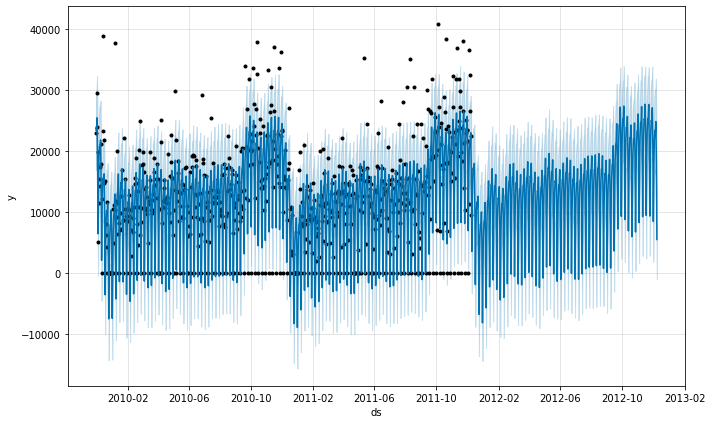

In [31]:
# Sales Forecasting
# Predict the future sales based on historical data using time-series forecasting techniques such as ARIMA, Prophet, or LSTM:

prophet_df = retail_df.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['Quantity'].sum().reset_index()
prophet_df.rename(columns={'InvoiceDate': 'ds', 'Quantity': 'y'}, inplace=True)
m = Prophet(daily_seasonality=True)
m.fit(prophet_df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast)

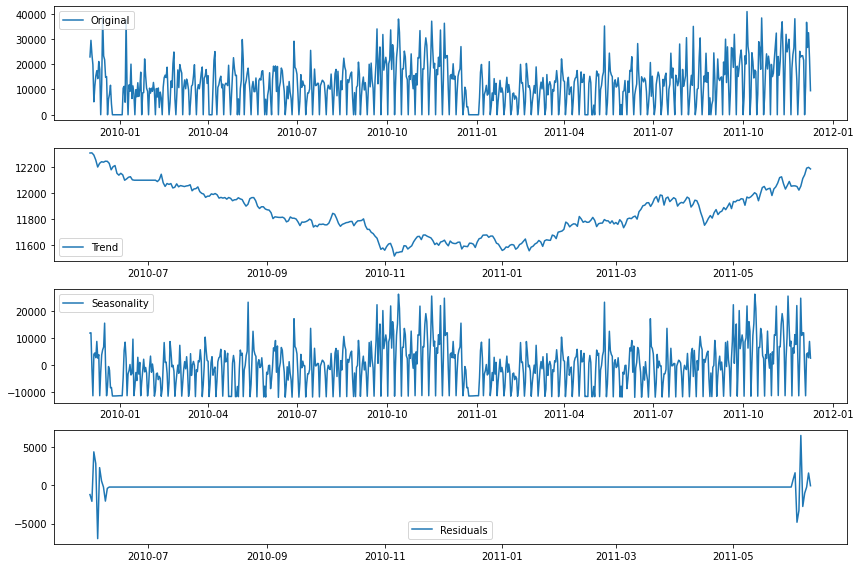

In [32]:
# explore seasonality and cyclical patterns, we can use a time series decomposition. 
decomposition = seasonal_decompose(retail_df.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['Quantity'].sum(), period=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(retail_df.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['Quantity'].sum(), label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()